Nama : Mohamad Maulana Firdaus Ramadhan
Asal : Institut Teknologi Bandung

In [292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os

import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout,MaxPooling2D , Conv2D,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

from IPython.display import clear_output
import warnings
warnings.filterwarnings('ignore')

In [308]:
data_dir = "./rockpaperscissors"
data_types= os.listdir(data_dir)
n=len(data_types)
print("Number of categories : ",n)

Number of categories :  3


In [294]:
# Set the random seed for reproducibility
seed = 42
tf.random.set_seed(seed)

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.4
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(100, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    seed=seed  # Set the seed for the training generator
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(100, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    seed=seed  # Set the seed for the validation generator
)


Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [295]:
#Create model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])


In [296]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_68 (Conv2D)          (None, 98, 148, 32)       896       
                                                                 
 max_pooling2d_68 (MaxPoolin  (None, 49, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_69 (Conv2D)          (None, 47, 72, 64)        18496     
                                                                 
 max_pooling2d_69 (MaxPoolin  (None, 23, 36, 64)       0         
 g2D)                                                            


                                                                 
 conv2d_70 (Conv2D)          (None, 21, 34, 128)       73856     
                                                                 
 max_pooling2d_70 (MaxPoolin  (None, 10, 17, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_71 (Conv2D)          (None, 8, 15, 256)        295168    
                                                                 
 max_pooling2d_71 (MaxPoolin  (None, 4, 7, 256)        0         
 g2D)                                                            
                                                                 
 flatten_19 (Flatten)        (None, 7168)              0         
                                                                 
 dense_58 (Dense)            (None, 512)               3670528   
                                                                 
 dense_59 

In [297]:
# Implement Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with Early Stopping
history = model.fit(train_generator,
                    epochs=30,
                    validation_data=val_generator,
                    callbacks=[early_stopping])

Epoch 1/30
42/42 [==============================] - 44s 1s/step - loss: 0.8444 - accuracy: 0.5769 - val_loss: 0.6375 - val_accuracy: 0.6819
Epoch 2/30
42/42 [==============================] - 41s 966ms/step - loss: 0.5151 - accuracy: 0.7922 - val_loss: 0.3909 - val_accuracy: 0.8490
Epoch 3/30
42/42 [==============================] - 41s 970ms/step - loss: 0.3945 - accuracy: 0.8440 - val_loss: 0.3275 - val_accuracy: 0.8764
Epoch 4/30
42/42 [==============================] - 40s 955ms/step - loss: 0.3251 - accuracy: 0.8767 - val_loss: 0.2614 - val_accuracy: 0.8993
Epoch 5/30
42/42 [==============================] - 40s 951ms/step - loss: 0.3042 - accuracy: 0.8874 - val_loss: 0.2768 - val_accuracy: 0.9016
Epoch 6/30
42/42 [==============================] - 40s 957ms/step - loss: 0.2149 - accuracy: 0.9262 - val_loss: 0.2090 - val_accuracy: 0.9222
Epoch 7/30
42/42 [==============================] - 41s 964ms/step - loss: 0.3184 - accuracy: 0.8874 - val_loss: 0.3139 - val_accuracy: 0.9027
Ep

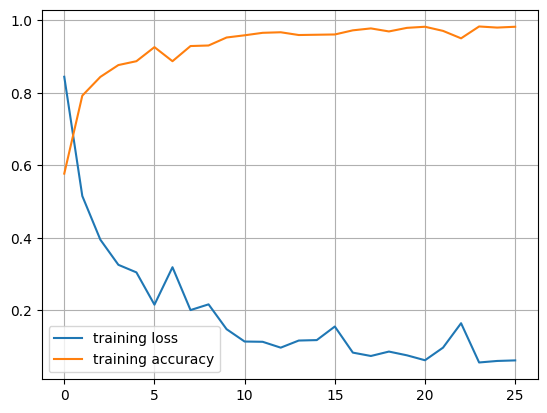

In [306]:
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.grid(True)
plt.legend()

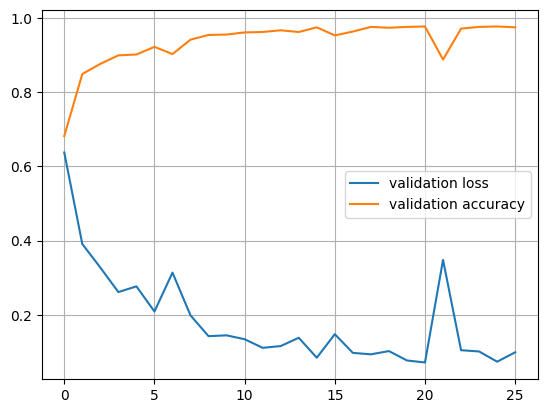

In [307]:
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.grid(True)
plt.legend()

1/1 [==============================] - 0s 33ms/step
./rockpaperscissors/scissors/3n4i3lKB3nZOpDVv.png
scissors


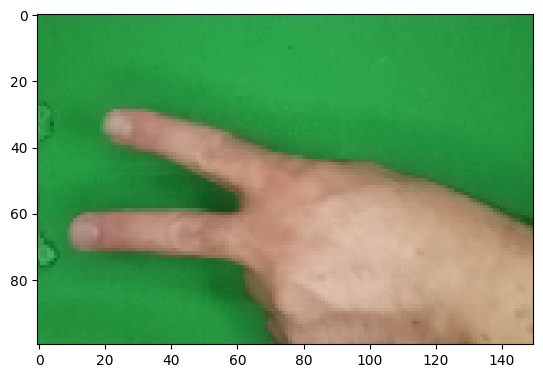

In [303]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

path = "./rockpaperscissors/scissors/3n4i3lKB3nZOpDVv.png"

img_source = image.load_img(path, target_size=(100, 150))
imgplot = plt.imshow(img_source)
x = image.img_to_array(img_source)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)

print(path)
if classes[0, 0] == 1:
    print('rock')
elif classes[0, 1] == 1:
    print('paper')
elif classes[0, 2] == 1:
    print('scissors')
